In [1]:
import os
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.decomposition import PCA

In [3]:
train_table = pd.read_csv("/content/drive/MyDrive/lectures/Intelligent World Informatics Lecture/final_project/mobile_prices/train.csv")
print(train_table)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [4]:
column_names = train_table.columns
print(column_names)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [5]:
print(len(column_names))

21


## visualize the training dataset

In [6]:
prices_unique = train_table["price_range"].unique()
print(prices_unique)

[1 2 3 0]


draw a histogram for the total price range to see whether the numbers of each price is balanced

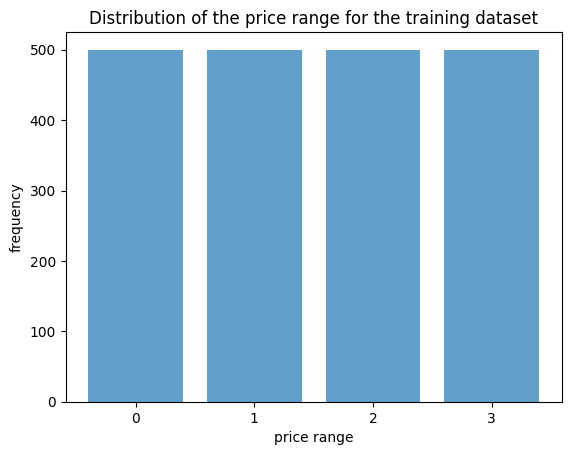

In [7]:
price_values = train_table["price_range"].to_numpy()
value_counts = dict(zip(*np.unique(price_values, return_counts=True)))
width = 0.8
# pos = np.array(list(value_counts.keys())) + width / 2 + 0.1
plt.bar(value_counts.keys(), value_counts.values(),  width = width, alpha=0.7)
plt.xlabel("price range")
plt.xticks(list(range(4)))
plt.ylabel("frequency")
plt.title("Distribution of the price range for the training dataset")
plt.grid(False)
plt.show()

## preprocess the train dataset
1. check nan
2. nomalize

In [8]:
nan_exists = train_table.isna().any()
print(nan_exists)

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


In [9]:
max_values = train_table.max()
print(max_values)
min_values = train_table.min()
print(min_values)

battery_power    1998.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1960.0
px_width         1998.0
ram              3998.0
sc_h               19.0
sc_w               18.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64
battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.

In [10]:
align = [500, 0., 0., 0., 0., 0., 0, 0, 50, 0., 0., 0., 500, 200, 0., 0., 0., 0., 0., 0., 0.]
scal = [1500, 1., 3., 1., 20., 1., 64., 1., 150., 8, 20., 2000., 1500., 3800., 20., 20., 20., 1., 1., 1., 3.]

In [11]:
normalized_table = (train_table - align) / scal
normalized_table["price_range"] = train_table["price_range"]
print(normalized_table)

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          0.228000   0.0     0.733333       0.0  0.05     0.0    0.109375   
1          0.347333   1.0     0.166667       1.0  0.00     1.0    0.828125   
2          0.042000   1.0     0.166667       1.0  0.10     1.0    0.640625   
3          0.076667   1.0     0.833333       0.0  0.00     0.0    0.156250   
4          0.880667   1.0     0.400000       0.0  0.65     1.0    0.687500   
...             ...   ...          ...       ...   ...     ...         ...   
1995       0.196000   1.0     0.166667       1.0  0.00     1.0    0.031250   
1996       0.976667   1.0     0.866667       1.0  0.00     0.0    0.609375   
1997       0.940667   0.0     0.300000       1.0  0.05     1.0    0.562500   
1998       0.674667   0.0     0.300000       0.0  0.20     1.0    0.718750   
1999       0.006667   1.0     0.666667       1.0  0.25     1.0    0.703125   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width      

Check whether negative values exist

In [12]:
nega_check = (normalized_table < 0).any()
print(nega_check)

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


In [ ]:
test_table = pd.read_csv("/content/drive/MyDrive/lectures/Intelligent World Informatics Lecture/final_project/mobile_prices/test.csv")
nor_test_table = (test_table - align) / scal
nor_test_table["price_range"] = test_table["price_range"]
test_s = nor_test_table.to_numpy()
test_data = test_s[:, :20]
test_label = test_s[:, 20]

# PCA + 2D visualization


In [20]:
train_s = normalized_table.to_numpy()

In [28]:
train_data = train_s[:, :20]
train_label = train_s[:, 20]

In [22]:
pca = PCA(n_components=2, random_state=42)
reduced_ts = pca.fit_transform(train_data)
print(reduced_ts.shape)

(2000, 2)


From visualization, we can see that each price range can't be clustered well after projected into 2d space

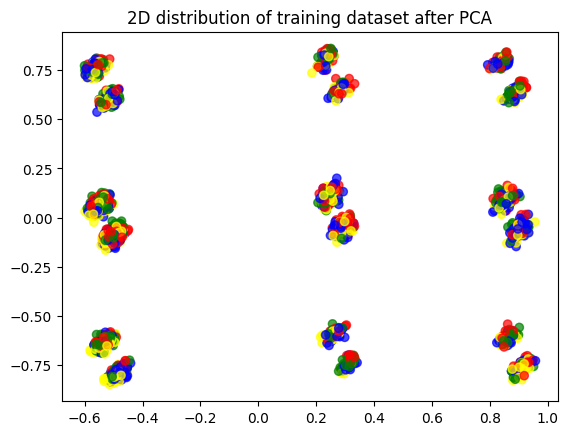

In [23]:
from matplotlib.colors import ListedColormap
label_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
colors = [label_colors[label] for label in train_label]
plt.scatter(reduced_ts[:, 0], reduced_ts[:, 1], alpha=0.7, c=colors)
plt.title("2D distribution of training dataset after PCA")
plt.show()

## classification with random forests

prepare the validation set by splitting the training dataset

In [29]:
rate = 0.1
split_index = int(len(train_data) * rate)

val_data = train_data[:split_index]
val_label = train_label[:split_index]

train_data = train_data[split_index:]
train_label = train_label[split_index:]
print("val_data shape: ", val_data.shape)
print("val_label shape: ", val_label.shape)
print("train_data shape:", train_data.shape)
print("train_label shape:", train_label.shape)

val_data shape:  (200, 20)
val_label shape:  (200,)
train_data shape: (1800, 20)
train_label shape: (1800,)


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
ran_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, bootstrap=True)
ran_clf.fit(train_data, train_label)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [33]:
pred_val_label = ran_clf.predict(val_data)
ones = np.ones_like(pred_val_label)
acc = np.sum(ones[pred_val_label == val_label]) / np.sum(ones)
print(f"accuracy: {acc:.3f}")

accuracy: 0.880


The accuracy is not enough high, try to add limits to max_leaf_nodes

In [34]:
ran_clf_2 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, bootstrap=True, max_leaf_nodes=16)
ran_clf_2.fit(train_data, train_label)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000, n_jobs=-1)

In [35]:
pred_val_label = ran_clf_2.predict(val_data)
ones = np.ones_like(pred_val_label)
acc = np.sum(ones[pred_val_label == val_label]) / np.sum(ones)
print(f"accuracy: {acc:.3f}")

accuracy: 0.825


The accuracy is getting worse, try to just increase the n_estimators

In [36]:
ran_clf_3 = RandomForestClassifier(n_estimators=1500, n_jobs=-1, bootstrap=True)
ran_clf_3.fit(train_data, train_label)

RandomForestClassifier(n_estimators=1500, n_jobs=-1)

In [37]:
pred_val_label = ran_clf_3.predict(val_data)
ones = np.ones_like(pred_val_label)
acc = np.sum(ones[pred_val_label == val_label]) / np.sum(ones)
print(f"accuracy: {acc:.3f}")

accuracy: 0.895


Not high enough, Let's see the feature importance to select important features

In [41]:
used_col_names = np.array(column_names[:20])
feature_importances = ran_clf_3.feature_importances_
sorted_index = np.argsort(feature_importances)

for name, score in zip(used_col_names[sorted_index], feature_importances[sorted_index]):
  print(name, f": {score:4f}")

three_g : 0.005447
blue : 0.006246
wifi : 0.006403
four_g : 0.006503
touch_screen : 0.006910
dual_sim : 0.006978
n_cores : 0.022409
m_dep : 0.024173
fc : 0.024856
sc_h : 0.026795
clock_speed : 0.027334
sc_w : 0.027645
pc : 0.028529
talk_time : 0.029599
int_memory : 0.035980
mobile_wt : 0.039644
px_width : 0.056246
px_height : 0.056852
battery_power : 0.075538
ram : 0.485912


We select columns with TOP10 importance

In [43]:
selected_col_names = used_col_names[sorted_index[10:]]
print(len(selected_col_names))
print(selected_col_names)

10
['clock_speed' 'sc_w' 'pc' 'talk_time' 'int_memory' 'mobile_wt' 'px_width'
 'px_height' 'battery_power' 'ram']


## here we repeat PCA and random forest with selected columns

In [44]:
new_train_data = train_s[:, :20][:, sorted_index[:10]]
new_train_label = train_s[:, 20]

rate = 0.1
split_index = int(len(new_train_data) * rate)

new_val_data = new_train_data[:split_index]
new_val_label = new_train_label[:split_index]

new_train_data = new_train_data[split_index:]
new_train_label = new_train_label[split_index:]
print("val_data shape: ", new_val_data.shape)
print("val_label shape: ", new_val_label.shape)
print("train_data shape:", new_train_data.shape)
print("train_label shape:", new_train_label.shape)

val_data shape:  (200, 10)
val_label shape:  (200,)
train_data shape: (1800, 10)
train_label shape: (1800,)


In [45]:
pca_new = PCA(n_components=2, random_state=42)
reduced_ts_new = pca_new.fit_transform(new_train_data)
print(reduced_ts_new.shape)

(1800, 2)


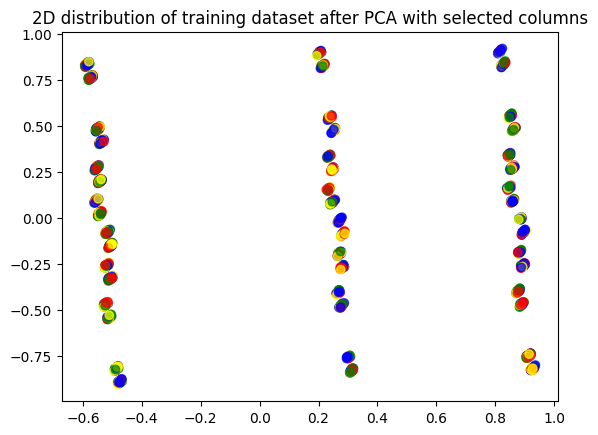

In [46]:
from matplotlib.colors import ListedColormap
label_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}
colors = [label_colors[label] for label in new_train_label]
plt.scatter(reduced_ts_new[:, 0], reduced_ts_new[:, 1], alpha=0.7, c=colors)
plt.title("2D distribution of training dataset after PCA with selected columns")
plt.show()

Still 4 price ranges are not well split. Then we try random forest

In [47]:
ran_clf_new = RandomForestClassifier(n_estimators=1500, n_jobs=-1, bootstrap=True)
ran_clf_new.fit(new_train_data, new_train_label)

RandomForestClassifier(n_estimators=1500, n_jobs=-1)

In [48]:
pred_val_label = ran_clf_new.predict(new_val_data)
ones = np.ones_like(pred_val_label)
acc = np.sum(ones[pred_val_label == new_val_label]) / np.sum(ones)
print(f"accuracy: {acc:.3f}")

accuracy: 0.270


The result got worse, so it seems better not to reduce features in classification

## use simple neural networks to do classification

In [81]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [58]:
test_table = pd.read_csv("/content/drive/MyDrive/lectures/Intelligent World Informatics Lecture/final_project/mobile_prices/test.csv")
print(test_table.columns)
print(len(test_table.columns))
nor_test_table = (test_table.iloc[:, 1:] - align[:20]) / scal[:20]
test_s = nor_test_table.to_numpy()
test_data = test_s

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
21


In [91]:
train_ds = MyDataset(train_data.astype(np.float32), train_label.astype(np.int32))
val_ds = MyDataset(val_data.astype(np.float32), val_label.astype(np.int32))

In [103]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader

batch_size = 32
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)

device = "cpu"

mlp = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(100, 4)
)

mlp.to(device)
optim = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.95)
loss_func = nn.CrossEntropyLoss()

In [89]:
def train_ep(model, train_dataloader, val_dataloader, optimzer, loss_func, device="cpu"):
  train_loss_list = []
  val_loss_list = []
  train_total = 0
  train_right = 0
  val_total = 0
  val_right = 0
  for data, label in train_dataloader:
    data = data.to(device)
    label = label.to(device)

    optim.zero_grad()
    predicted = model(data)

    loss = loss_func(predicted, label)
    loss.backward()

    optim.step()

    train_loss_list.append(loss.item())
    train_total += len(data)
    train_right += torch.sum(torch.argmax(predicted, dim=-1) == label).item()

  with torch.no_grad():
    for data, label in val_dataloader:
      data = data.to(device)
      label = label.to(device)

      predicted = model(data)
      loss = loss_func(predicted, label)

      val_loss_list.append(loss.item())
      val_total += len(data)
      val_right += torch.sum(torch.argmax(predicted, dim=-1) == label).item()

  return np.average(train_loss_list), np.average(val_loss_list), train_right/train_total, val_right/val_total


In [104]:
epochs = 100
early_stoppping = 10
best_v_a = 0
best_epoch = 0
for i in range(epochs):
  t_l, v_l, t_a, v_a = train_ep(mlp, train_dl, val_dl, optim, loss_func, device=device)
  print(f"Epoch: {i+1} train_loss: {t_l:4f} train_acc: {t_a:4f} val_loss: {v_l:4f} val_acc: {v_a:4f}")
  if v_a > best_v_a:
    best_v_a = v_a
    best_epoch = i
  else:
    if i - best_epoch > early_stoppping:
      break;

Epoch: 1 train_loss: 1.386652 train_acc: 0.250556 val_loss: 1.382520 val_acc: 0.300000
Epoch: 2 train_loss: 1.384977 train_acc: 0.276111 val_loss: 1.382641 val_acc: 0.285000
Epoch: 3 train_loss: 1.382899 train_acc: 0.336111 val_loss: 1.381752 val_acc: 0.330000
Epoch: 4 train_loss: 1.380773 train_acc: 0.369444 val_loss: 1.378362 val_acc: 0.370000
Epoch: 5 train_loss: 1.379164 train_acc: 0.376667 val_loss: 1.375362 val_acc: 0.435000
Epoch: 6 train_loss: 1.377056 train_acc: 0.341111 val_loss: 1.372683 val_acc: 0.410000
Epoch: 7 train_loss: 1.374059 train_acc: 0.418889 val_loss: 1.371833 val_acc: 0.425000
Epoch: 8 train_loss: 1.370330 train_acc: 0.444444 val_loss: 1.364861 val_acc: 0.535000
Epoch: 9 train_loss: 1.364752 train_acc: 0.464444 val_loss: 1.361106 val_acc: 0.505000
Epoch: 10 train_loss: 1.357041 train_acc: 0.480000 val_loss: 1.349654 val_acc: 0.535000
Epoch: 11 train_loss: 1.346294 train_acc: 0.481111 val_loss: 1.334387 val_acc: 0.550000
Epoch: 12 train_loss: 1.330837 train_acc: